In [1]:
from beacon_api import *

In [2]:
client = Client("https://beacon-ihm.maris.nl")

Connected to: https://beacon-ihm.maris.nl/ server successfully


In [3]:
tables = client.list_tables()
tables

{'easy_ihm_aquadesk_api': <beacon_api.table.DataTable at 0x2ad759a9280>,
 'ihm_aquadesk_api': <beacon_api.table.DataTable at 0x2ad759ce690>,
 'ihm_wadar': <beacon_api.table.DataTable at 0x2ad75986c30>,
 'ihm_aquadesk_noordzee': <beacon_api.table.DataTable at 0x2ad759ce6c0>,
 'ihm_rws_ctd': <beacon_api.table.DataTable at 0x2ad759cdd60>,
 'ihm_vogel_monitoring': <beacon_api.table.DataTable at 0x2ad759ce930>,
 'easy_rws_ctd': <beacon_api.table.DataTable at 0x2ad759ce720>,
 'easy_ihm_aquadesk_noordzee': <beacon_api.table.DataTable at 0x2ad759ce420>,
 'easy_ihm_wadar': <beacon_api.table.DataTable at 0x2ad759ce780>,
 'default': <beacon_api.table.DataTable at 0x2ad75951d90>,
 'ihm_wmr': <beacon_api.table.DataTable at 0x2ad759ce2a0>,
 'ihm_vis_monitoring': <beacon_api.table.DataTable at 0x2ad759cddf0>}

In [4]:
tables['ihm_wadar'].get_table_schema()

Tijdstip: timestamp[ns]
Waarde_Numeriek: double
Locatie: string
Statuswaarde: string
Bemonsteringshoogte: int64
Referentievlak: string
OpdrachtgevendeInstantie: string
Kwaliteitswaardecode: int64
Loc.Lat: double
Loc.Lon: double
Loc.Code: string
Meta.Compartiment.Code: string
Meta.Grootheid.Code: string
Meta.Grootheid.Oms: string
Meta.Parameter.Code: string
Meta.Eenheid: string
Meta.Hoedanigheid: string
Meta.WaardeBewerkingsMethode: string

In [5]:
df_wadar = (
    tables["ihm_wadar"]
    .query()
    .add_select_column("Loc.Lon", alias="longitude")
    .add_select_column("Loc.Lat", alias="latitude")
    .add_select_column("Tijdstip")
    .add_select_column("Waarde_Numeriek")
    .add_select_column("Locatie")
    .add_select_column("Statuswaarde")
    .add_select_column("Bemonsteringshoogte")
    .add_select_column("Referentievlak")
    .add_select_column("OpdrachtgevendeInstantie")
    .add_select_column("Kwaliteitswaardecode")
    .add_select_column("Loc.Code")
    .add_select_column("Meta.Compartiment.Code")
    .add_select_column("Meta.Grootheid.Code")
    .add_select_column("Meta.Grootheid.Oms")
    .add_select_column("Meta.Parameter.Code")
    .add_select_column("Meta.Eenheid")
    .add_select_column("Meta.Hoedanigheid")
    .add_select_column("Meta.WaardeBewerkingsMethode")
    .add_equals_filter("Meta.Grootheid.Code", eq = "T")
    .add_range_filter("Waarde_Numeriek", -2, 35)
    .add_filter(EqualsFilter("Locatie", eq = 'Ameland, Nes (Ameland, Nes)'))
    .to_pandas_dataframe()
)

Running query: {"from": "ihm_wadar", "select": [{"column": "Loc.Lon", "alias": "longitude"}, {"column": "Loc.Lat", "alias": "latitude"}, {"column": "Tijdstip", "alias": null}, {"column": "Waarde_Numeriek", "alias": null}, {"column": "Locatie", "alias": null}, {"column": "Statuswaarde", "alias": null}, {"column": "Bemonsteringshoogte", "alias": null}, {"column": "Referentievlak", "alias": null}, {"column": "OpdrachtgevendeInstantie", "alias": null}, {"column": "Kwaliteitswaardecode", "alias": null}, {"column": "Loc.Code", "alias": null}, {"column": "Meta.Compartiment.Code", "alias": null}, {"column": "Meta.Grootheid.Code", "alias": null}, {"column": "Meta.Grootheid.Oms", "alias": null}, {"column": "Meta.Parameter.Code", "alias": null}, {"column": "Meta.Eenheid", "alias": null}, {"column": "Meta.Hoedanigheid", "alias": null}, {"column": "Meta.WaardeBewerkingsMethode", "alias": null}], "filters": [{"column": "Meta.Grootheid.Code", "eq": "T"}, {"column": "Waarde_Numeriek", "gt_eq": -2, "lt

In [6]:
df_wadar

,longitude,latitude,Tijdstip,Waarde_Numeriek,Locatie,Statuswaarde,Bemonsteringshoogte,Referentievlak,OpdrachtgevendeInstantie,Kwaliteitswaardecode,Loc.Code,Meta.Compartiment.Code,Meta.Grootheid.Code,Meta.Grootheid.Oms,Meta.Parameter.Code,Meta.Eenheid,Meta.Hoedanigheid,Meta.WaardeBewerkingsMethode
0,5.759448,53.429766,2010-11-19 13:25:00,13.57,"Ameland, Nes (Ameland, Nes)",Gecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
1,5.759448,53.429766,2010-11-19 13:35:00,13.52,"Ameland, Nes (Ameland, Nes)",Gecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
2,5.759448,53.429766,2010-11-19 13:45:00,13.68,"Ameland, Nes (Ameland, Nes)",Gecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
3,5.759448,53.429766,2010-11-19 13:55:00,13.69,"Ameland, Nes (Ameland, Nes)",Gecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
4,5.759448,53.429766,2010-11-19 14:05:00,13.70,"Ameland, Nes (Ameland, Nes)",Gecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651826,5.759448,53.429766,2024-06-02 23:10:00,6.70,"Ameland, Nes (Ameland, Nes)",Ongecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
651827,5.759448,53.429766,2024-06-02 23:20:00,6.70,"Ameland, Nes (Ameland, Nes)",Ongecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
651828,5.759448,53.429766,2024-06-02 23:30:00,6.70,"Ameland, Nes (Ameland, Nes)",Ongecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing
651829,5.759448,53.429766,2024-06-02 23:40:00,6.90,"Ameland, Nes (Ameland, Nes)",Ongecontroleerd,1000,NAP,RIKZSBW,0,ameland.nes,LT,T,Temperatuur,None,graad Celsius,NVT,Niet van toepassing


In [7]:
tables['ihm_aquadesk_api'].get_table_schema()

Organisation: string
Supplier: string
Projects: string
Code: string
Description: string
Parameter: string
LifeForm: string
Value: double
Uom: string
Count: double
Type: string
ResultOf: string
SamplingMethod: string
AnalysisMethod: string
Compartment: string
Geography: string
ResultTime: string
Quantity: string
TaxonType: string
TaxonRank: string
TaxonGroup: string
TaxonNameNl: string
ParameterType: string
Behaviour: string
Sampler: string
Completeness: string
Statistic: string
RecordingMethod: string
KrwCode: string
Purpose: string
Source: string
MeasurementPackage: string
MonitoringNetworks: string
longitude: double
latitude: double
taxonID: string
scientificNameID: string
acceptedNameUsageID: string
parentNameUsageID: string
namePublishedInID: string
scientificName: string
acceptedNameUsage: string
parentNameUsage: string
namePublishedIn: string
namePublishedInYear: string
kingdom: string
phylum: string
class: string
order: string
family: string
genus: string
subgenus: string
specif

In [8]:
df_aquadesk= (
    tables["ihm_aquadesk_api"]
    .query()
    .add_select_column("Organisation")
    .add_select_column("Supplier")
    .add_select_column("Projects")
    .add_select_column("Code")
    .add_select_column("Description")
    .add_select_column("Parameter")
    .add_select_column("kingdom")
    .add_select_column("phylum")
    .add_select_column("class")
    .add_select_column("order")
    .add_select_column("family")
    .add_select_column("genus")
    .add_select_column("subgenus")
    .add_select_column("LifeForm")
    .add_select_column("Value")
    .add_select_column("Uom")
    .add_select_column("Count")
    .add_select_column("Type")
    .add_select_column("ResultOf")
    .add_select_column("SamplingMethod")
    .add_select_column("AnalysisMethod")
    .add_select_column("Compartment")
    .add_select_column("ResultTime")
    .add_select_column("Quantity")
    .add_select_column("TaxonType")
    .add_select_column("TaxonRank")
    .add_select_column("TaxonGroup")
    .add_select_column("TaxonNameNl")
    .add_select_column("ParameterType")
    .add_select_column("Behaviour")
    .add_select_column("Sampler")
    .add_select_column("Completeness")
    .add_select_column("Statistic")
    .add_select_column("RecordingMethod")
    .add_select_column("KrwCode")
    .add_select_column("Purpose")
    .add_select_column("Source")
    .add_select_column("MeasurementPackage")
    .add_select_column("MonitoringNetworks")
    .add_select_column("longitude")
    .add_select_column("latitude")
    .to_pandas_dataframe()
)

Running query: {"from": "ihm_aquadesk_api", "select": [{"column": "Organisation", "alias": null}, {"column": "Supplier", "alias": null}, {"column": "Projects", "alias": null}, {"column": "Code", "alias": null}, {"column": "Description", "alias": null}, {"column": "Parameter", "alias": null}, {"column": "kingdom", "alias": null}, {"column": "phylum", "alias": null}, {"column": "class", "alias": null}, {"column": "order", "alias": null}, {"column": "family", "alias": null}, {"column": "genus", "alias": null}, {"column": "subgenus", "alias": null}, {"column": "LifeForm", "alias": null}, {"column": "Value", "alias": null}, {"column": "Uom", "alias": null}, {"column": "Count", "alias": null}, {"column": "Type", "alias": null}, {"column": "ResultOf", "alias": null}, {"column": "SamplingMethod", "alias": null}, {"column": "AnalysisMethod", "alias": null}, {"column": "Compartment", "alias": null}, {"column": "ResultTime", "alias": null}, {"column": "Quantity", "alias": null}, {"column": "Taxon

In [9]:
df_aquadesk

,Organisation,Supplier,Projects,Code,Description,Parameter,kingdom,phylum,class,order,...,Completeness,Statistic,RecordingMethod,KrwCode,Purpose,Source,MeasurementPackage,MonitoringNetworks,longitude,latitude
0,RWS,None,None,RG52,Waal: Tiel - Zaltbommel,Haematopus ostralegus,Animalia,Chordata,Aves,Charadriiformes,...,COMPLETE,None,None,None,None,Sovon,None,None,5.360769,51.832119
1,RWS,None,None,RG52,Waal: Tiel - Zaltbommel,Haematopus ostralegus,Animalia,Chordata,Aves,Charadriiformes,...,COMPLETE,None,None,None,None,Sovon,None,None,5.360769,51.832119
2,RWS,None,None,RG52,Waal: Tiel - Zaltbommel,Haematopus ostralegus,Animalia,Chordata,Aves,Charadriiformes,...,COMPLETE,None,None,None,None,Sovon,None,None,5.360769,51.832119
3,RWS,None,None,RG52,Waal: Tiel - Zaltbommel,Haematopus ostralegus,Animalia,Chordata,Aves,Charadriiformes,...,COMPLETE,None,None,None,None,Sovon,None,None,5.360769,51.832119
4,RWS,None,None,RG52,Waal: Tiel - Zaltbommel,Haematopus ostralegus,Animalia,Chordata,Aves,Charadriiformes,...,COMPLETE,None,None,None,None,Sovon,None,None,5.360769,51.832119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202946,RWS,None,None,ZO4160,"Westerschelde, Haven Terneuzen tot Paulinapolder",Oxyura jamaicensis,None,None,None,None,...,COMPLETE,None,None,None,None,Sovon,None,None,3.748217,51.348781
5202947,RWS,None,None,ZO4160,"Westerschelde, Haven Terneuzen tot Paulinapolder",Calcarius lapponicus,None,None,None,None,...,COMPLETE,None,None,None,None,Sovon,None,None,3.748217,51.348781
5202948,RWS,None,None,ZO4111,"WS110, Hoge Platen (= De Bol)",Calcarius lapponicus,None,None,None,None,...,COMPLETE,None,None,None,None,Sovon,None,None,3.613887,51.399864
5202949,RWS,None,None,ZO4111,"WS110, Hoge Platen (= De Bol)",Calcarius lapponicus,None,None,None,None,...,COMPLETE,None,None,None,None,Sovon,None,None,3.613887,51.399864


In [10]:
tables['ihm_rws_ctd'].get_table_schema()

FID: string
metadata_index: int64
index: int64
diepte: double
diepte_grootheid: string
diepte_eenheid: string
druk: double
druk_grootheid: string
druk_eenheid: string
typeringcode: double
grootheidcode: string
hoedanigheidcode: double
parametercode: string
parameteromschrijving: double
begindatum: timestamp[ns]
numeriekewaarde: double
eenheidcode: string
waardebewerkingsmethodecode: double
waardebepalingsmethodecode: double
geom: string
longitude: double
latitude: double

In [11]:
df_rws_ctd= (
    tables["ihm_rws_ctd"]
    .query()
    .add_select_column("FID")
    .add_select_column("metadata_index")
    .add_select_column("index")
    .add_select_column("diepte")
    .add_select_column("diepte_grootheid")
    .add_select_column("diepte_eenheid")
    .add_select_column("druk")
    .add_select_column("druk_grootheid")
    .add_select_column("druk_eenheid")
    .add_select_column("typeringcode")
    .add_select_column("grootheidcode")
    .add_select_column("hoedanigheidcode")
    .add_select_column("parametercode")
    .add_select_column("parameteromschrijving")
    .add_select_column("begindatum")
    .add_select_column("numeriekewaarde")
    .add_select_column("eenheidcode")
    .add_select_column("waardebewerkingsmethodecode")
    .add_select_column("waardebepalingsmethodecode")
    .add_select_column("geom")
    .add_select_column("longitude")
    .add_select_column("latitude")
    .to_pandas_dataframe()
)

Running query: {"from": "ihm_rws_ctd", "select": [{"column": "FID", "alias": null}, {"column": "metadata_index", "alias": null}, {"column": "index", "alias": null}, {"column": "diepte", "alias": null}, {"column": "diepte_grootheid", "alias": null}, {"column": "diepte_eenheid", "alias": null}, {"column": "druk", "alias": null}, {"column": "druk_grootheid", "alias": null}, {"column": "druk_eenheid", "alias": null}, {"column": "typeringcode", "alias": null}, {"column": "grootheidcode", "alias": null}, {"column": "hoedanigheidcode", "alias": null}, {"column": "parametercode", "alias": null}, {"column": "parameteromschrijving", "alias": null}, {"column": "begindatum", "alias": null}, {"column": "numeriekewaarde", "alias": null}, {"column": "eenheidcode", "alias": null}, {"column": "waardebewerkingsmethodecode", "alias": null}, {"column": "waardebepalingsmethodecode", "alias": null}, {"column": "geom", "alias": null}, {"column": "longitude", "alias": null}, {"column": "latitude", "alias": nu

In [12]:
df_rws_ctd

,FID,metadata_index,index,diepte,diepte_grootheid,diepte_eenheid,druk,druk_grootheid,druk_eenheid,typeringcode,...,parametercode,parameteromschrijving,begindatum,numeriekewaarde,eenheidcode,waardebewerkingsmethodecode,waardebepalingsmethodecode,geom,longitude,latitude
0,ctd_complete.fid--38095bbf_192434e0b36_f01,2016,802309,31.872,DIEPTE,m,32.163,DRUK,Pa,NaN,...,NVT,NaN,2012-06-21 06:01:00,10.388200,oC,NaN,NaN,POINT (4.041111 54.41556),4.041111,54.41556
1,ctd_complete.fid--38095bbf_192434e0b36_f02,2016,802309,31.872,DIEPTE,m,32.163,DRUK,Pa,NaN,...,NVT,NaN,2012-06-21 06:01:00,34.750800,g/m3,NaN,NaN,POINT (4.041111 54.41556),4.041111,54.41556
2,ctd_complete.fid--38095bbf_192434e0b36_f03,2016,802309,31.872,DIEPTE,m,32.163,DRUK,Pa,NaN,...,NVT,NaN,2012-06-21 06:01:00,7.984000,DMSLS,NaN,NaN,POINT (4.041111 54.41556),4.041111,54.41556
3,ctd_complete.fid--38095bbf_192434e0b36_f04,2016,802309,31.872,DIEPTE,m,32.163,DRUK,Pa,NaN,...,NVT,NaN,2012-06-21 06:01:00,1.852900,umol/m2.s,NaN,NaN,POINT (4.041111 54.41556),4.041111,54.41556
4,ctd_complete.fid--38095bbf_192434e0b36_f05,2016,802309,31.872,DIEPTE,m,32.163,DRUK,Pa,NaN,...,NVT,NaN,2012-06-21 06:01:00,3.822666,S/m,NaN,NaN,POINT (4.041111 54.41556),4.041111,54.41556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26897553,ctd_complete.fid--38095bbf_1924350f2f7_174e,2382,1217795,5.824,DIEPTE,m,5.877,DRUK,Pa,NaN,...,NVT,NaN,2015-06-16 10:56:00,4.004637,S/m,NaN,NaN,POINT (6.214167 54.11806),6.214167,54.11806
26897554,ctd_complete.fid--38095bbf_1924350f2f7_174f,2382,1217795,5.824,DIEPTE,m,5.877,DRUK,Pa,NaN,...,NVT,NaN,2015-06-16 10:56:00,8.322000,DMSLS,NaN,NaN,POINT (6.214167 54.11806),6.214167,54.11806
26897555,ctd_complete.fid--38095bbf_1924350f2f7_1750,2382,1217795,5.824,DIEPTE,m,5.877,DRUK,Pa,NaN,...,NVT,NaN,2015-06-16 10:56:00,2522.500000,umol/m2.s,NaN,NaN,POINT (6.214167 54.11806),6.214167,54.11806
26897556,ctd_complete.fid--38095bbf_1924350f2f7_1751,2382,1217795,5.824,DIEPTE,m,5.877,DRUK,Pa,NaN,...,NVT,NaN,2015-06-16 10:56:00,0.004610,s,NaN,NaN,POINT (6.214167 54.11806),6.214167,54.11806


In [13]:
tables['ihm_vis_monitoring'].get_table_schema()

Unnamed: 0: int64
ctd_update: string
id: string
calculatedunit: string
calculatedvalue: double
aggregate: string
changedate: string
collectiondate: string
compartment: string
measuredunit: string
measuredvalue: double
measurementsetnumber: double
organisation: string
parameter: string
parametertype: string
quantity: string
samplingdevice: string
sourcesystem: string
status: int64
taxontype: string
wmr_area_code: string
wmr_waterbody_krw: string
wkt: string
geom: string
longitude: double
latitude: double
AphiaID: double
Match type: string
LSID: string
TSN: double
Qualitystatus: string
Taxon status: string
ScientificName: string
Authority: string
AphiaID_accepted: double
ScientificName_accepted: string
Authority_accepted: string
Kingdom: string
Phylum: string
Class: string
Order: string
Family: string
Genus: string
Subgenus: double
Species: string
Subspecies: string
isMarine: double
isBrackish: double
isFresh: double
isTerrestrial: double

In [14]:
df_vis_monitoring = (
    tables["ihm_vis_monitoring"]
    .query()
    .add_select_column("calculatedunit")
    .add_select_column("calculatedvalue")
    .add_select_column("aggregate")
    .add_select_column("changedate")
    .add_select_column("collectiondate")
    .add_select_column("compartment")
    .add_select_column("measuredunit")
    .add_select_column("measuredvalue")
    .add_select_column("measurementsetnumber")
    .add_select_column("organisation")
    .add_select_column("parameter")
    .add_select_column("parametertype")
    .add_select_column("quantity")
    .add_select_column("samplingdevice")
    .add_select_column("sourcesystem")
    .add_select_column("taxontype")
    .add_select_column("wmr_area_code")
    .add_select_column("wmr_waterbody_krw")
    .add_select_column("wkt")
    .add_select_column("geom")
    .add_select_column("longitude")
    .add_select_column("latitude")
    .add_select_column("AphiaID")
    .to_pandas_dataframe()
)

Running query: {"from": "ihm_vis_monitoring", "select": [{"column": "calculatedunit", "alias": null}, {"column": "calculatedvalue", "alias": null}, {"column": "aggregate", "alias": null}, {"column": "changedate", "alias": null}, {"column": "collectiondate", "alias": null}, {"column": "compartment", "alias": null}, {"column": "measuredunit", "alias": null}, {"column": "measuredvalue", "alias": null}, {"column": "measurementsetnumber", "alias": null}, {"column": "organisation", "alias": null}, {"column": "parameter", "alias": null}, {"column": "parametertype", "alias": null}, {"column": "quantity", "alias": null}, {"column": "samplingdevice", "alias": null}, {"column": "sourcesystem", "alias": null}, {"column": "taxontype", "alias": null}, {"column": "wmr_area_code", "alias": null}, {"column": "wmr_waterbody_krw", "alias": null}, {"column": "wkt", "alias": null}, {"column": "geom", "alias": null}, {"column": "longitude", "alias": null}, {"column": "latitude", "alias": null}, {"column": "

In [15]:
df_vis_monitoring

,calculatedunit,calculatedvalue,aggregate,changedate,collectiondate,compartment,measuredunit,measuredvalue,measurementsetnumber,organisation,...,samplingdevice,sourcesystem,taxontype,wmr_area_code,wmr_waterbody_krw,wkt,geom,longitude,latitude,AphiaID
0,kg,0.219942,No,2023-08-28 12:28:26.071356,2019-10-31,OW,None,NaN,877718.0,Wageningen universiteit en onderzoeksinstituten,...,Boomkor03k,WUR-WMR-AQP,VISSN,nwat,Nieuwe Waterweg,None,None,NaN,NaN,127139.0
1,n,1.000000,No,2023-08-28 12:28:26.071356,2019-10-31,OW,n,1.00,877718.0,Wageningen universiteit en onderzoeksinstituten,...,Boomkor03k,WUR-WMR-AQP,VISSN,nwat,Nieuwe Waterweg,None,None,NaN,NaN,127139.0
2,None,NaN,No,2023-08-28 12:28:26.071356,2019-10-31,OW,m2,3000.00,877718.0,Wageningen universiteit en onderzoeksinstituten,...,Boomkor03k,WUR-WMR-AQP,VISSN,nwat,Nieuwe Waterweg,None,None,NaN,NaN,127139.0
3,None,NaN,No,2023-08-28 12:28:26.071356,2019-10-31,OW,m,0.29,877718.0,Wageningen universiteit en onderzoeksinstituten,...,Boomkor03k,WUR-WMR-AQP,VISSN,nwat,Nieuwe Waterweg,None,None,NaN,NaN,127139.0
4,kg,0.273781,No,2023-08-28 12:28:26.071356,2019-10-31,OW,None,NaN,877718.0,Wageningen universiteit en onderzoeksinstituten,...,Boomkor03k,WUR-WMR-AQP,VISSN,nwat,Nieuwe Waterweg,None,None,NaN,NaN,127139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845434,None,NaN,Yes,2023-10-29 16:17:21.90935,None,None,None,NaN,NaN,Wageningen universiteit en onderzoeksinstituten,...,None,WUR-WMR-AQP,None,None,None,None,None,NaN,NaN,NaN
4845435,None,NaN,Yes,2023-10-29 16:17:21.90935,None,None,None,NaN,NaN,Wageningen universiteit en onderzoeksinstituten,...,None,WUR-WMR-AQP,None,None,None,None,None,NaN,NaN,NaN
4845436,None,NaN,Yes,2023-10-29 16:17:21.90935,None,None,None,NaN,NaN,Wageningen universiteit en onderzoeksinstituten,...,None,WUR-WMR-AQP,None,None,None,None,None,NaN,NaN,NaN
4845437,None,NaN,Yes,2023-10-29 16:17:21.90935,None,None,None,NaN,NaN,Wageningen universiteit en onderzoeksinstituten,...,None,WUR-WMR-AQP,None,None,None,None,None,NaN,NaN,NaN


In [16]:
tables['ihm_vogel_monitoring'].get_table_schema()

ctd_update: string
calculatedunit: string
calculatedvalue: double
changedate: string
collectiondate: string
collectionenddate: string
collectionstartdate: string
compartment: string
euring: int64
jaar: int64
measuredvalue: double
measurementgeography_gebiedid: string
measurementgeography_gebiedopmerking: string
measurementgeography_naam: string
measurementgeography_type: string
measurementpurpose: string
measurementsattributes_0_attribute: string
measurementsattributes_0_attributetype: string
measurementsattributes_1_attribute: string
measurementsattributes_1_attributetype: string
measurementsattributes_2_attribute: string
measurementsattributes_2_attributetype: string
nivo: string
parametertype: string
status: int64
taxon_nl: string
taxonname: string

In [17]:
df_vogel_monitoring = (
    tables["ihm_vogel_monitoring"]
    .query()
    .add_select_column("ctd_update")
    .add_select_column("calculatedunit")
    .add_select_column("calculatedvalue")
    .add_select_column("changedate")
    .add_select_column("collectiondate")
    .add_select_column("compartment")
    .add_select_column("measuredvalue")
    .add_select_column("measurementgeography_gebiedid")
    .add_select_column("measurementgeography_gebiedopmerking")
    .add_select_column("measurementgeography_naam")
    .add_select_column("measurementgeography_type")
    .add_select_column("measurementpurpose")
    .add_select_column("parametertype")
    .add_select_column("status")
    .add_select_column("taxon_nl")
    .add_select_column("taxonname")
    .to_pandas_dataframe()
)

Running query: {"from": "ihm_vogel_monitoring", "select": [{"column": "ctd_update", "alias": null}, {"column": "calculatedunit", "alias": null}, {"column": "calculatedvalue", "alias": null}, {"column": "changedate", "alias": null}, {"column": "collectiondate", "alias": null}, {"column": "compartment", "alias": null}, {"column": "measuredvalue", "alias": null}, {"column": "measurementgeography_gebiedid", "alias": null}, {"column": "measurementgeography_gebiedopmerking", "alias": null}, {"column": "measurementgeography_naam", "alias": null}, {"column": "measurementgeography_type", "alias": null}, {"column": "measurementpurpose", "alias": null}, {"column": "parametertype", "alias": null}, {"column": "status", "alias": null}, {"column": "taxon_nl", "alias": null}, {"column": "taxonname", "alias": null}], "filters": [], "output": {"format": "parquet"}}


In [18]:
df_vogel_monitoring

,ctd_update,calculatedunit,calculatedvalue,changedate,collectiondate,compartment,measuredvalue,measurementgeography_gebiedid,measurementgeography_gebiedopmerking,measurementgeography_naam,measurementgeography_type,measurementpurpose,parametertype,status,taxon_nl,taxonname
0,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90330,telgebied,"Renesse, Watergat",MultiPolygon,MT,Taxon,60,steltkluut,Himantopus himantopus
1,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90329,telgebied,"Pyramide, Clarapolderkreek",MultiPolygon,MT,Taxon,60,dwergstern,Sterna albifrons
2,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90329,telgebied,"Pyramide, Clarapolderkreek",MultiPolygon,MT,Taxon,60,noordse stern,Sterna paradisaea
3,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90329,telgebied,"Pyramide, Clarapolderkreek",MultiPolygon,MT,Taxon,60,visdief,Sterna hirundo
4,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90329,telgebied,"Pyramide, Clarapolderkreek",MultiPolygon,MT,Taxon,60,grote stern,Sterna sandvicensis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052524,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90330,telgebied,"Renesse, Watergat",MultiPolygon,MT,Taxon,60,zwartkopmeeuw,Larus melanocephalus
6052525,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90330,telgebied,"Renesse, Watergat",MultiPolygon,MT,Taxon,60,strandplevier,Charadrius alexandrinus
6052526,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90330,telgebied,"Renesse, Watergat",MultiPolygon,MT,Taxon,60,bontbekplevier,Charadrius hiaticula
6052527,2024-04-12 12:09:38,n,0.0,2023-12-18 10:36:06.338698,2015-01-01,NT,0.0,BMP90330,telgebied,"Renesse, Watergat",MultiPolygon,MT,Taxon,60,kleine plevier,Charadrius dubius


In [19]:
tables['ihm_wmr'].get_table_schema()

FID: string
ident_m: string
meetpunt_identificatie: string
compartiment_code: string
bemonsteringsmethode_code: string
bemonsteringsmethode_codespace: string
bemonsteringsapparaat_code: string
bemonsteringsapparaat_codespace: string
monsternemingsdatum: string
monsternemingstijd: string
geometriepunt_x: double
geometriepunt_y: double
referentiehorizontaal_code: string
wmr_datacluster_m: string
wmr_datagroup_m: string
wmr_fcname: double
wmr_gisid: int64
wmr_giscode: double
wmr_aphia_m: double
wmr_year_m: int64
ident_t: string
grootheid_code: string
parameter_groep: string
parameter_omschrijving: string
eenheid_code: string
hoedanigheid_code: string
waardebewerkingsmethode_code: double
waardebewerkingsmethode_codespace: double
waardebepalingsmethode_code: string
waardebepalingsmethode_codespace: string
begindatum: string
begintijd: string
einddatum: double
resultaatdatum: string
numeriekewaarde: double
kwaliteitsoordeel_code: int64
wmr_aphiaid_t: double
wmr_datagroup_t: string
wmr_year_t

In [20]:
df_wmr = (
    tables["ihm_wmr"]
    .query()
    .add_select_column("meetpunt_identificatie")
    .add_select_column("compartiment_code")
    .add_select_column("bemonsteringsmethode_code")
    .add_select_column("bemonsteringsmethode_codespace")
    .add_select_column("bemonsteringsapparaat_code")
    .add_select_column("bemonsteringsapparaat_codespace")
    .add_select_column("monsternemingsdatum")
    .add_select_column("monsternemingstijd")
    .add_select_column("geometriepunt_x")
    .add_select_column("geometriepunt_y")
    .add_select_column("referentiehorizontaal_code")
    .add_select_column("grootheid_code")
    .add_select_column("parameter_groep")
    .add_select_column("parameter_omschrijving")
    .add_select_column("eenheid_code")
    .add_select_column("hoedanigheid_code")
    .add_select_column("waardebewerkingsmethode_code")
    .add_select_column("resultaatdatum")
    .add_select_column("longitude")
    .add_select_column("latitude")
    .add_select_column("wmr_aphiaid_t")
    .add_select_column("monsternemingsdatumtijd")
    .to_pandas_dataframe()
)

Running query: {"from": "ihm_wmr", "select": [{"column": "meetpunt_identificatie", "alias": null}, {"column": "compartiment_code", "alias": null}, {"column": "bemonsteringsmethode_code", "alias": null}, {"column": "bemonsteringsmethode_codespace", "alias": null}, {"column": "bemonsteringsapparaat_code", "alias": null}, {"column": "bemonsteringsapparaat_codespace", "alias": null}, {"column": "monsternemingsdatum", "alias": null}, {"column": "monsternemingstijd", "alias": null}, {"column": "geometriepunt_x", "alias": null}, {"column": "geometriepunt_y", "alias": null}, {"column": "referentiehorizontaal_code", "alias": null}, {"column": "grootheid_code", "alias": null}, {"column": "parameter_groep", "alias": null}, {"column": "parameter_omschrijving", "alias": null}, {"column": "eenheid_code", "alias": null}, {"column": "hoedanigheid_code", "alias": null}, {"column": "waardebewerkingsmethode_code", "alias": null}, {"column": "resultaatdatum", "alias": null}, {"column": "longitude", "alias

In [21]:
df_wmr

,meetpunt_identificatie,compartiment_code,bemonsteringsmethode_code,bemonsteringsmethode_codespace,bemonsteringsapparaat_code,bemonsteringsapparaat_codespace,monsternemingsdatum,monsternemingstijd,geometriepunt_x,geometriepunt_y,...,parameter_groep,parameter_omschrijving,eenheid_code,hoedanigheid_code,waardebewerkingsmethode_code,resultaatdatum,longitude,latitude,wmr_aphiaid_t,monsternemingsdatumtijd
0,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,Zuigkor,www.imares.nl,1993-06-20,12:00,3.500000,51.575000,...,None,None,m2,NVT,NaN,1993-06-20,3.500000,51.575000,NaN,1993-06-20 12:00:00
1,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,Zuigkor,www.imares.nl,1993-06-20,12:00,3.500000,51.575000,...,None,None,ha,NVT,NaN,1993-06-20,3.500000,51.575000,NaN,1993-06-20 12:00:00
2,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,Zuigkor,www.imares.nl,1993-06-20,12:00,3.500000,51.575000,...,Biotaxon,Animalia,n/m2,NVT,NaN,1993-06-20,3.500000,51.575000,2.0,1993-06-20 12:00:00
3,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,Zuigkor,www.imares.nl,1993-06-20,12:00,3.500000,51.583333,...,None,None,m2,NVT,NaN,1993-06-20,3.500000,51.583333,NaN,1993-06-20 12:00:00
4,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.imares.nl,Zuigkor,www.imares.nl,1993-06-20,12:00,3.500000,51.583333,...,None,None,ha,NVT,NaN,1993-06-20,3.500000,51.583333,NaN,1993-06-20 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951892,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.wageningenmarineresearch.nl,Zuigkor,www.wageningenmarineresearch.nl,2023-06-21,18:16,3.616667,51.616667,...,None,None,m2,NVT,NaN,2023-06-21,3.616667,51.616667,NaN,2023-06-21 18:16:00
951893,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.wageningenmarineresearch.nl,Zuigkor,www.wageningenmarineresearch.nl,2023-06-21,18:16,3.616667,51.616667,...,None,None,ha,NVT,NaN,2023-06-21,3.616667,51.616667,NaN,2023-06-21 18:16:00
951894,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.wageningenmarineresearch.nl,Zuigkor,www.wageningenmarineresearch.nl,2023-06-21,18:16,3.616667,51.616667,...,Biotaxon,Macomangulus tenuis,g/m2,NVT,NaN,2023-06-21,3.616667,51.616667,141595.0,2023-06-21 18:16:00
951895,NL80_VOORDELTA,BS,Perdon & Troost 2012. CVO rapport: 12.006,www.wageningenmarineresearch.nl,Zuigkor,www.wageningenmarineresearch.nl,2023-06-21,18:16,3.616667,51.616667,...,Biotaxon,Macomangulus tenuis,n/m2,NVT,NaN,2023-06-21,3.616667,51.616667,141595.0,2023-06-21 18:16:00


In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

def plot_all_datasets_map(dataset_dfs):
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    dataset_colors = {name: colors[i % len(colors)] for i, name in enumerate(dataset_dfs.keys())}

    min_lon = min(df['longitude'].min() for df in dataset_dfs.values())
    max_lon = max(df['longitude'].max() for df in dataset_dfs.values())
    min_lat = min(df['latitude'].min() for df in dataset_dfs.values())
    max_lat = max(df['latitude'].max() for df in dataset_dfs.values())

    lon_padding = (max_lon - min_lon) * 0.1
    lat_padding = (max_lat - min_lat) * 0.1
    map_extent = [min_lon - lon_padding, max_lon + lon_padding,
                  min_lat - lat_padding, max_lat + lat_padding]

    # Create figure and map
    fig = plt.figure(figsize=(13, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    # Add map features
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.3)

    # Plot each dataset
    for name, df in dataset_dfs.items():
        ax.scatter(
            df['longitude'],
            df['latitude'],
            s=40,
            c=dataset_colors[name],
            edgecolor='black',
            transform=ccrs.PlateCarree(),
            label=name
        )

    # Add legend and gridlines
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0), title="Datasets")
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False

    plt.title('All Data Points by Data collection')
    plt.show()


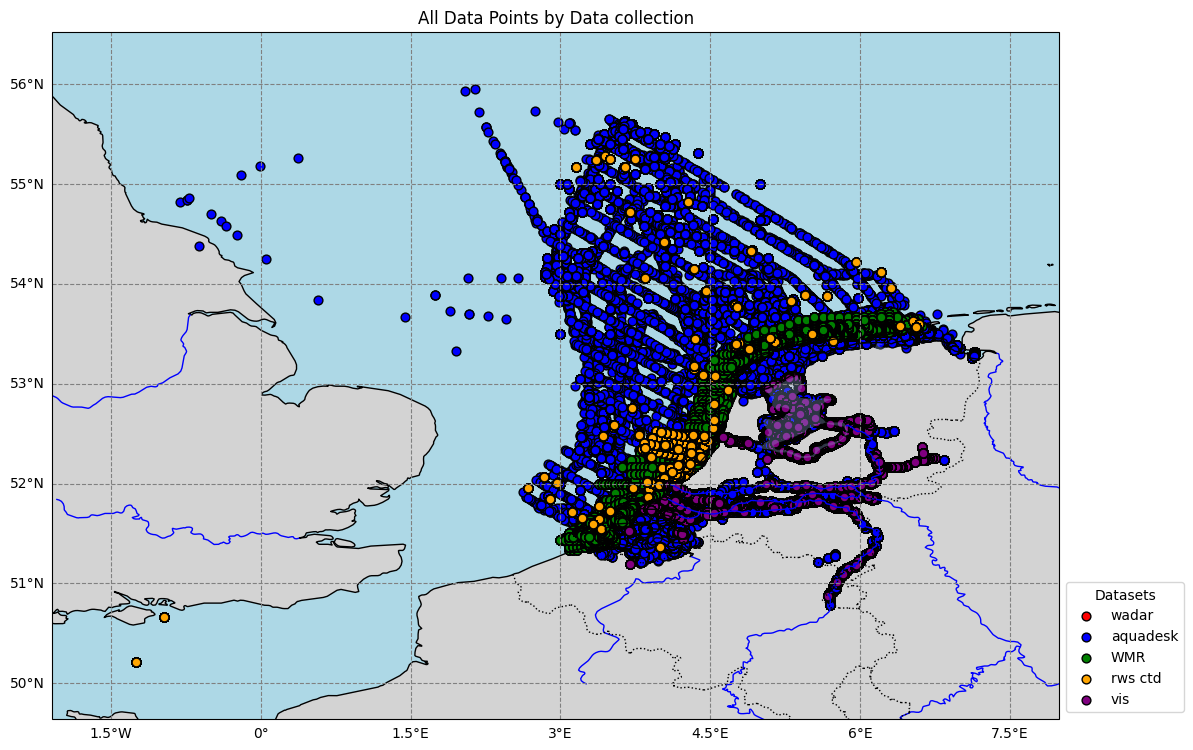

In [23]:
dataset_dfs = {
    'wadar': df_wadar,
    'aquadesk': df_aquadesk,
    'WMR': df_wmr,
    'rws ctd': df_rws_ctd,
    'vis': df_vis_monitoring
}

plot_all_datasets_map(dataset_dfs)

In [24]:
df_small_wadar = df_wadar[['Tijdstip', 'Waarde_Numeriek']].copy()
df_small_wadar['Tijdstip'] = pd.to_datetime(df_small_wadar['Tijdstip'], errors='coerce')
df_small_wadar = df_small_wadar.dropna(subset=['Tijdstip'])
df_small_wadar = df_small_wadar.sort_values(by='Tijdstip', ascending=True).reset_index(drop=True)
df_resampled_wadar = df_small_wadar.set_index('Tijdstip').resample('D').mean().reset_index()
df_small_ctd = df_rws_ctd[['begindatum', 'numeriekewaarde', 'eenheidcode']].copy()
df_small_ctd['begindatum'] = pd.to_datetime(df_small_ctd['begindatum'], errors='coerce')
df_small_ctd = df_small_ctd.dropna(subset=['begindatum'])
df_small_ctd = df_small_ctd.sort_values(by='begindatum', ascending=True).reset_index(drop=True)
df_small_ctd = df_small_ctd.loc[df_small_ctd['eenheidcode'] == "oC"]
df_resampled_ctd = df_small_ctd.set_index('begindatum')['numeriekewaarde'].resample('D').mean().reset_index()

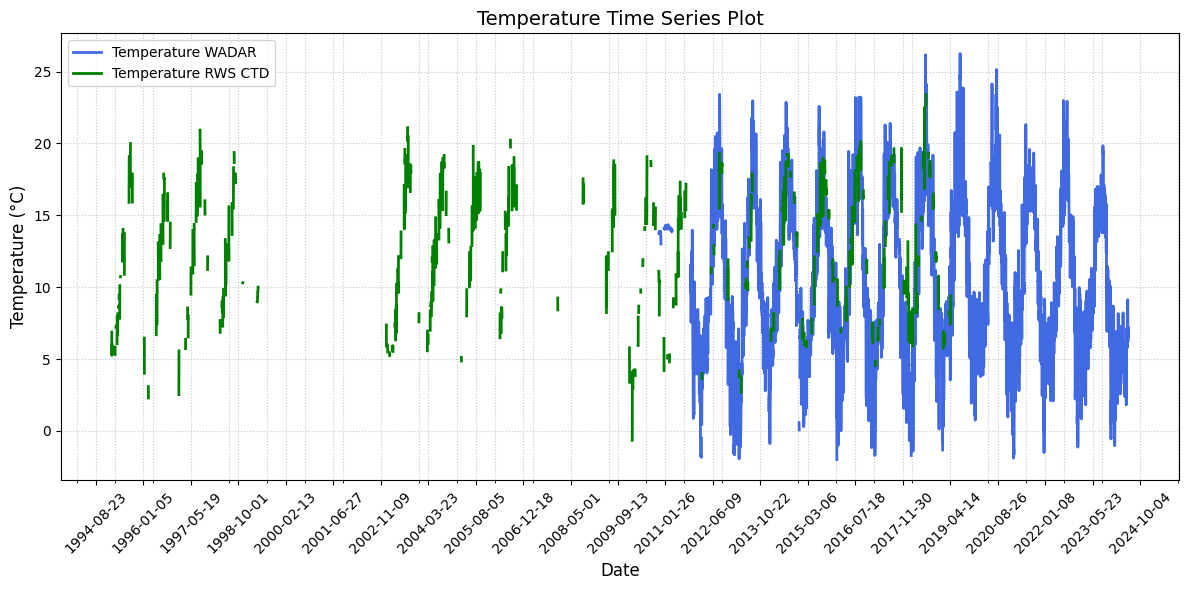

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_resampled_wadar['Tijdstip'], df_resampled_wadar['Waarde_Numeriek'], color='royalblue', linewidth=2, alpha=1, label='Temperature WADAR')
ax.plot(df_resampled_ctd['begindatum'], df_resampled_ctd['numeriekewaarde'], color='green', linewidth=2, alpha=1, label='Temperature RWS CTD')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature Time Series Plot', fontsize=14)

ax.xaxis.set_major_locator(plt.MaxNLocator(28))  
ax.xaxis.set_minor_locator(plt.MaxNLocator(36)) 
plt.xticks(rotation=45)

ax.grid(True, which='both', linestyle=':', alpha=0.7)

ax.legend()

plt.tight_layout()

plt.show()